# Final Project

I will be following the Machine Learning Flow, which includes:
1. Get Data
2. Clean, Prepare, & Manipulate Data
3. Train Model
4. Test Data
5. Improve

## 1. Get Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'data/breast_cancer_bd.csv'
df = pd.read_csv(path)

df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2. Clean, Prepare, & Manipulate Data

In [3]:
df.drop('Sample code number', axis=1, inplace=True)

In [4]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
print('-'*10, 'Column Values', '-'*10)
for col in df.columns:
    print(f'{col}: {sorted(df[col].unique())}')

---------- Column Values ----------
Clump Thickness: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Uniformity of Cell Size: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Uniformity of Cell Shape: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Marginal Adhesion: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Single Epithelial Cell Size: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Bare Nuclei: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', '?']
Bland Chromatin: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Normal Nucleoli: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Mitoses: [1, 2, 3, 4, 5, 6, 7, 8, 10]
Class: [2, 4]


In [7]:
col = 'Bare Nuclei'

bad_idxs = df.loc[df['Bare Nuclei'] == '?', :].index
df.drop(bad_idxs, inplace=True)

df[col] = df[col].astype(np.int64)

In [8]:
print('-'*10, 'Column Values', '-'*10)
for col in df.columns:
    print(f'{col}: {sorted(df[col].unique())}')

---------- Column Values ----------
Clump Thickness: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Uniformity of Cell Size: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Uniformity of Cell Shape: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Marginal Adhesion: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Single Epithelial Cell Size: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Bare Nuclei: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Bland Chromatin: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Normal Nucleoli: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Mitoses: [1, 2, 3, 4, 5, 6, 7, 8, 10]
Class: [2, 4]


In [9]:
target_col = 'Class'
df[target_col].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [10]:
# 2 (benign) --> 0, 4 (malignant) --> 1
target_col = 'Class'

df[target_col] = df[target_col].apply(lambda x: 0 if x == 2 else 1)
df[target_col].value_counts()

Class
0    444
1    239
Name: count, dtype: int64

In [11]:
df[target_col].value_counts(normalize=True)

Class
0    0.650073
1    0.349927
Name: proportion, dtype: float64

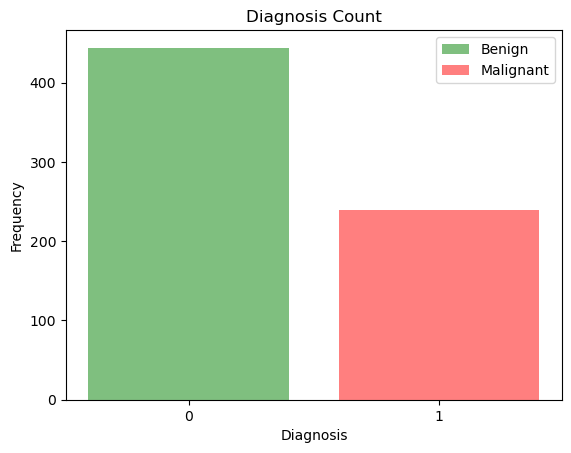

In [12]:
target_counts = df[target_col].value_counts()

fig, axs = plt.subplots()

axs.bar(target_counts.index[0], target_counts[0], color='g', alpha=0.5, label='Benign')
axs.bar(target_counts.index[1], target_counts[1], color='r', alpha=0.5, label='Malignant')
axs.set_xlabel('Diagnosis')
axs.set_ylabel('Frequency')
axs.set_title('Diagnosis Count')
axs.set_xticks([0, 1])
axs.legend()

# plt.savefig('Diagnosis Count.png')
plt.show()

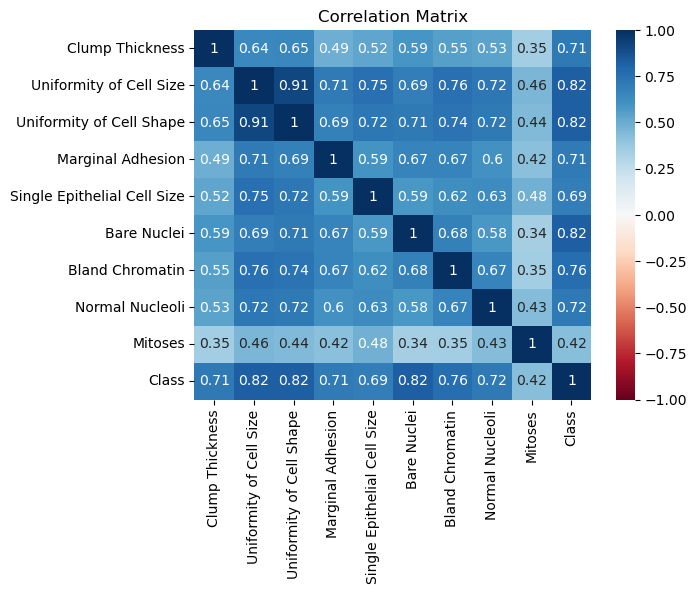

In [13]:
corr_matrix = df.corr()

fig, axs = plt.subplots()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='RdBu', annot=True, ax=axs)
axs.set_title('Correlation Matrix')

# plt.savefig('Correlation Matrix.png')
plt.show()

In [14]:
X = df.drop('Class', axis=1).to_numpy()
y = df['Class'].to_numpy()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_test_std[:5, :]

array([[-0.13141759, -0.69972806, -0.73664766, -0.64462192, -0.53837783,
        -0.70943788, -0.17706904, -0.60521218, -0.35793256],
       [-0.47847619, -0.69972806, -0.73664766, -0.64462192, -0.53837783,
        -0.70943788, -1.01507895, -0.60521218, -0.35793256],
       [ 0.56269962, -0.69972806, -0.73664766,  0.05014534, -0.53837783,
        -0.70943788, -1.01507895, -0.60521218, -0.35793256],
       [-0.47847619, -0.69972806, -0.73664766, -0.64462192, -0.53837783,
        -0.70943788, -1.01507895, -0.60521218, -0.35793256],
       [ 0.21564102,  0.28400727,  0.25897227,  0.74491259,  1.7884269 ,
         1.75185386, -0.17706904, -0.2692175 , -0.35793256]])

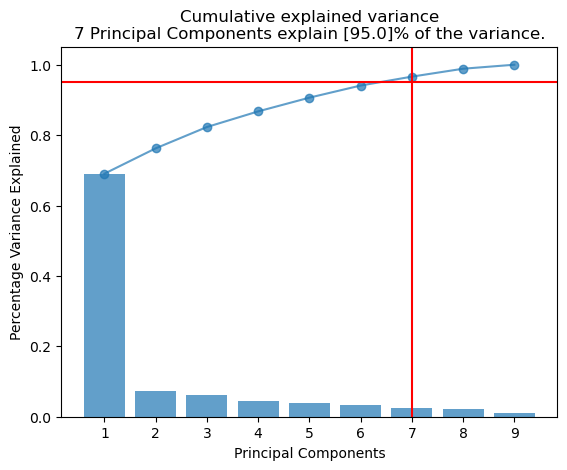

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

exp_var = pd.Series(pca.explained_variance_ratio_)
cum_var = exp_var.cumsum()
y_thresh = 0.95
x_thresh = cum_var[cum_var.gt(y_thresh)].index[0] + 1

# Calculate the amount of variance explained added by each additional component

fig, axs = plt.subplots()

axs.bar(exp_var.index + 1, exp_var, alpha=0.7)
axs.plot(exp_var.index + 1, cum_var, marker='o', alpha=0.7) #plot line chart of increasing variances
axs.axhline(y=y_thresh, color='r', linestyle='-')
axs.axvline(x=x_thresh, color='r', linestyle='-')
axs.set_xlabel('Principal Components')
axs.set_ylabel('Percentage Variance Explained')
axs.set_title(f'Cumulative explained variance\n' +
              f'{x_thresh} Principal Components explain [{y_thresh*100}]% of the variance.')
axs.set_xticks(np.arange(1, 10))

# plt.savefig('PCA EDA.png')
plt.show()

## 3. Train Model

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10)
pipe_lr = Pipeline(steps=[
    ('scaler', scaler),
    ('lr', lr)
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression(C=10))])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

n = 5
knn = KNeighborsClassifier(n_neighbors=n)

pipe_knn = Pipeline(steps=[
    ('scaler', scaler),
    ('knn', knn)
])

pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

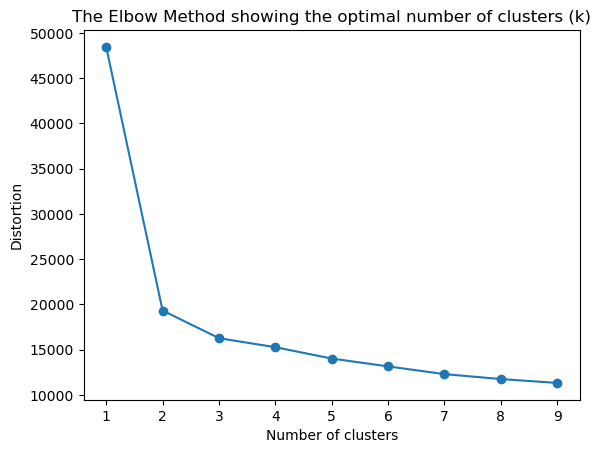

In [20]:
from sklearn.cluster import KMeans

# Create Elbow Plot

inertias = []
n_clusters = range(1,10)
for n_clust in n_clusters:
    model = KMeans(n_clusters=n_clust,
                   n_init='auto',
                   random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

fig, axs = plt.subplots()
axs.plot(n_clusters, inertias)
axs.scatter(n_clusters, inertias)
axs.set_xlabel('Number of clusters')
axs.set_ylabel('Distortion')
axs.set_title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [21]:
kmeans = KMeans(n_clusters=2,
                n_init='auto',
                random_state=42)

pipe_kmeans = Pipeline(steps=[
    ('scaler', scaler),
    ('kmeans', kmeans)
])

pipe_kmeans.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans',
                 KMeans(n_clusters=2, n_init='auto', random_state=42))])

## 4. Test Data

In [22]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, ConfusionMatrixDisplay

def get_metrics(y, y_pred, model_used):
    model_recall = recall_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred)
    model_f1 = f1_score(y_test, y_pred)
    model_accuracy = accuracy_score(y_test, y_pred)
    return [model_used, model_recall, model_precision, model_f1, model_accuracy]

def plot_confusion(y, y_pred, title, ax):
    disp = ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap='Reds', ax=ax, colorbar=False)
    disp.ax_.set_title(title)

In [23]:
# Log Reg scores
y_pred_lr = pipe_lr.predict(X_test)
scores_lr = get_metrics(y_test, y_pred_lr, 'Logistic Regression')

# KNN scores
y_pred_knn = pipe_knn.predict(X_test)
scores_knn = get_metrics(y_test, y_pred_knn, f'KNN [n={n}]')

# KMeans scores
clusters = pipe_kmeans.predict(X_test)

# Change cluster majority to match target majority
if np.sum(clusters) > len(clusters) / 2:
  clusters = 1 - clusters
scores_kmeans = get_metrics(y_test, clusters, 'KMeans [n=2]')

# Merge predictions
predictions = pd.DataFrame(data=[scores_lr, scores_knn, scores_kmeans], columns=['Model', 'Recall', 'Precision', 'F1 Score', 'Accuracy'])
predictions.sort_values(by=['Recall'], ascending=False, inplace=True, ignore_index=True)
predictions

,Model,Recall,Precision,F1 Score,Accuracy
0,Logistic Regression,0.944444,0.931507,0.937931,0.956098
1,KNN [n=5],0.944444,0.931507,0.937931,0.956098
2,KMeans [n=2],0.930556,0.930556,0.930556,0.951220


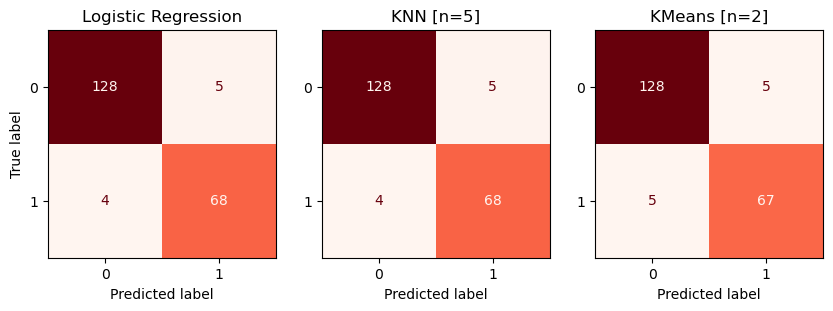

In [24]:
# Plot confusion matrices of models
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

plot_confusion(y_test, y_pred_lr, 'Logistic Regression', ax=ax1)
plot_confusion(y_test, y_pred_knn, f'KNN [n={n}]', ax=ax2)
plot_confusion(y_test, clusters, 'KMeans [n=2]', ax=ax3)

ax2.yaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)

plt.show()

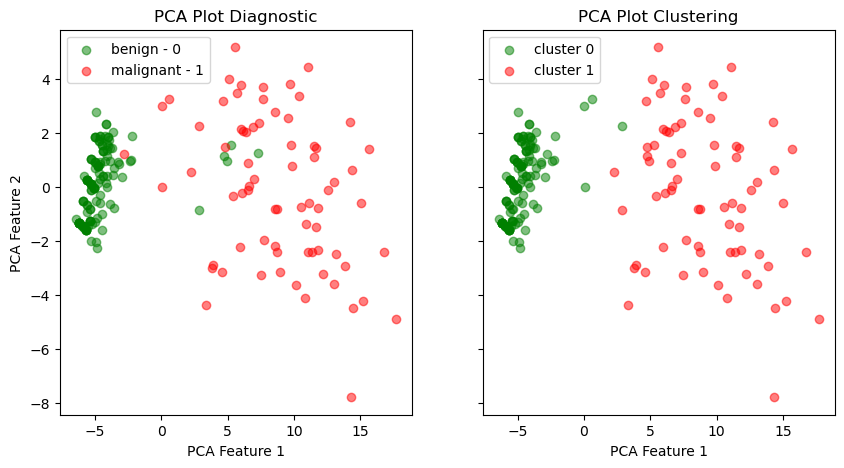

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

pca = PCA()
pca.fit(X_train)
X_test_pca = pca.transform(X_test)

ax1.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='g', alpha=0.5, label='benign - 0')
ax1.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='r', alpha=0.5, label='malignant - 1')
ax1.set_xlabel('PCA Feature 1')
ax1.set_ylabel('PCA Feature 2')
ax1.set_title('PCA Plot Diagnostic')
ax1.legend()

ax2.scatter(X_test_pca[clusters == 0, 0], X_test_pca[clusters == 0, 1], color='g', alpha=0.5, label='cluster 0')
ax2.scatter(X_test_pca[clusters == 1, 0], X_test_pca[clusters == 1, 1], color='r', alpha=0.5, label='cluster 1')
ax2.set_xlabel('PCA Feature 1')
ax2.set_title('PCA Plot Clustering')
ax2.legend()

plt.show()

## 5. Improve

In [26]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

kfold = StratifiedKFold(n_splits=10,
                        shuffle=True,
                        random_state=42).split(X_train, y_train)

params = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'lr__solver': ['lbfgs', 'liblinear']}

grid_lr = GridSearchCV(pipe_lr, param_grid=params, cv=kfold,
                       scoring='recall').fit(X_train, y_train)

print('Best parameters:', grid_lr.best_params_)
print('Best score:', grid_lr.best_score_)

Best parameters: {'lr__C': 0.001, 'lr__solver': 'liblinear'}
Best score: 0.9702205882352942


In [27]:
lr_v2 = LogisticRegression(C=0.001,
                           solver='liblinear')

pipe_lr_v2 = Pipeline(steps=[
    ('scaler', scaler),
    ('knn', lr_v2)
])

pipe_lr_v2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', LogisticRegression(C=0.001, solver='liblinear'))])

In [28]:
y_pred_lr_v2 = pipe_lr_v2.predict(X_test)
scores_lr_v2 = get_metrics(y_test, y_pred_lr_v2, f'Log Reg v2')

prediction = pd.DataFrame(data=[scores_lr_v2], columns=['Model', 'Recall', 'Precision', 'F1 Score', 'Accuracy'])
predictions = pd.concat([predictions, prediction])
predictions.sort_values(by=['Recall'], ascending=False, inplace=True, ignore_index=True)
predictions

,Model,Recall,Precision,F1 Score,Accuracy
0,Log Reg v2,0.958333,0.932432,0.945205,0.960976
1,Logistic Regression,0.944444,0.931507,0.937931,0.956098
2,KNN [n=5],0.944444,0.931507,0.937931,0.956098
3,KMeans [n=2],0.930556,0.930556,0.930556,0.951220


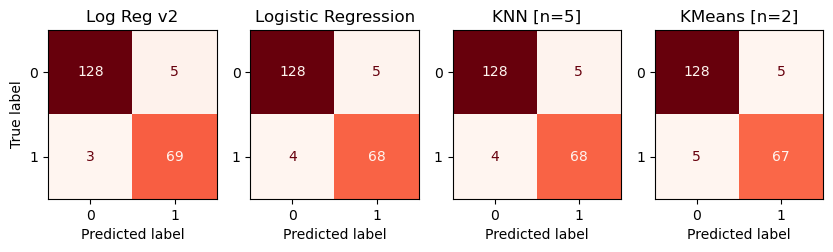

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))

plot_confusion(y_test, y_pred_lr_v2, f'Log Reg v2', ax=ax1)
plot_confusion(y_test, y_pred_lr, 'Logistic Regression', ax=ax2)
plot_confusion(y_test, y_pred_knn, f'KNN [n={n}]', ax=ax3)
plot_confusion(y_test, clusters, 'KMeans [n=2]', ax=ax4)

ax2.yaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)
ax4.yaxis.label.set_visible(False)

plt.show()